# Retrieval-Augmented Generation

## The World Of LLMs

Generative AI and large language models (LLMs) have transformed the way businesses harness data to derive insights. These models possess incredible power, yet their effectiveness depends heavily on the context and quality of data provided.

Services like Amazon Bedrock have further amplified these opportunities ***and challenges***, making it easier for businesses to integrate Gen AI into their operations and innovate more efficiently.

Amid this rapid, transformative evolution, Retrieval-Augmented Generation (RAG) is emerging as a key approach for effective enterprise use cases.

RAG enhances LLMs by connecting them to external knowledge/data sources, thus enriching their responses with up-to-date and contextually relevant information. This technique significantly improves the quality and accuracy of the generated outcomes, allowing enterprises to adapt quickly to new challenges.

By incorporating relevant data at the time of generation, RAG makes LLMs more responsive to specific business needs.  

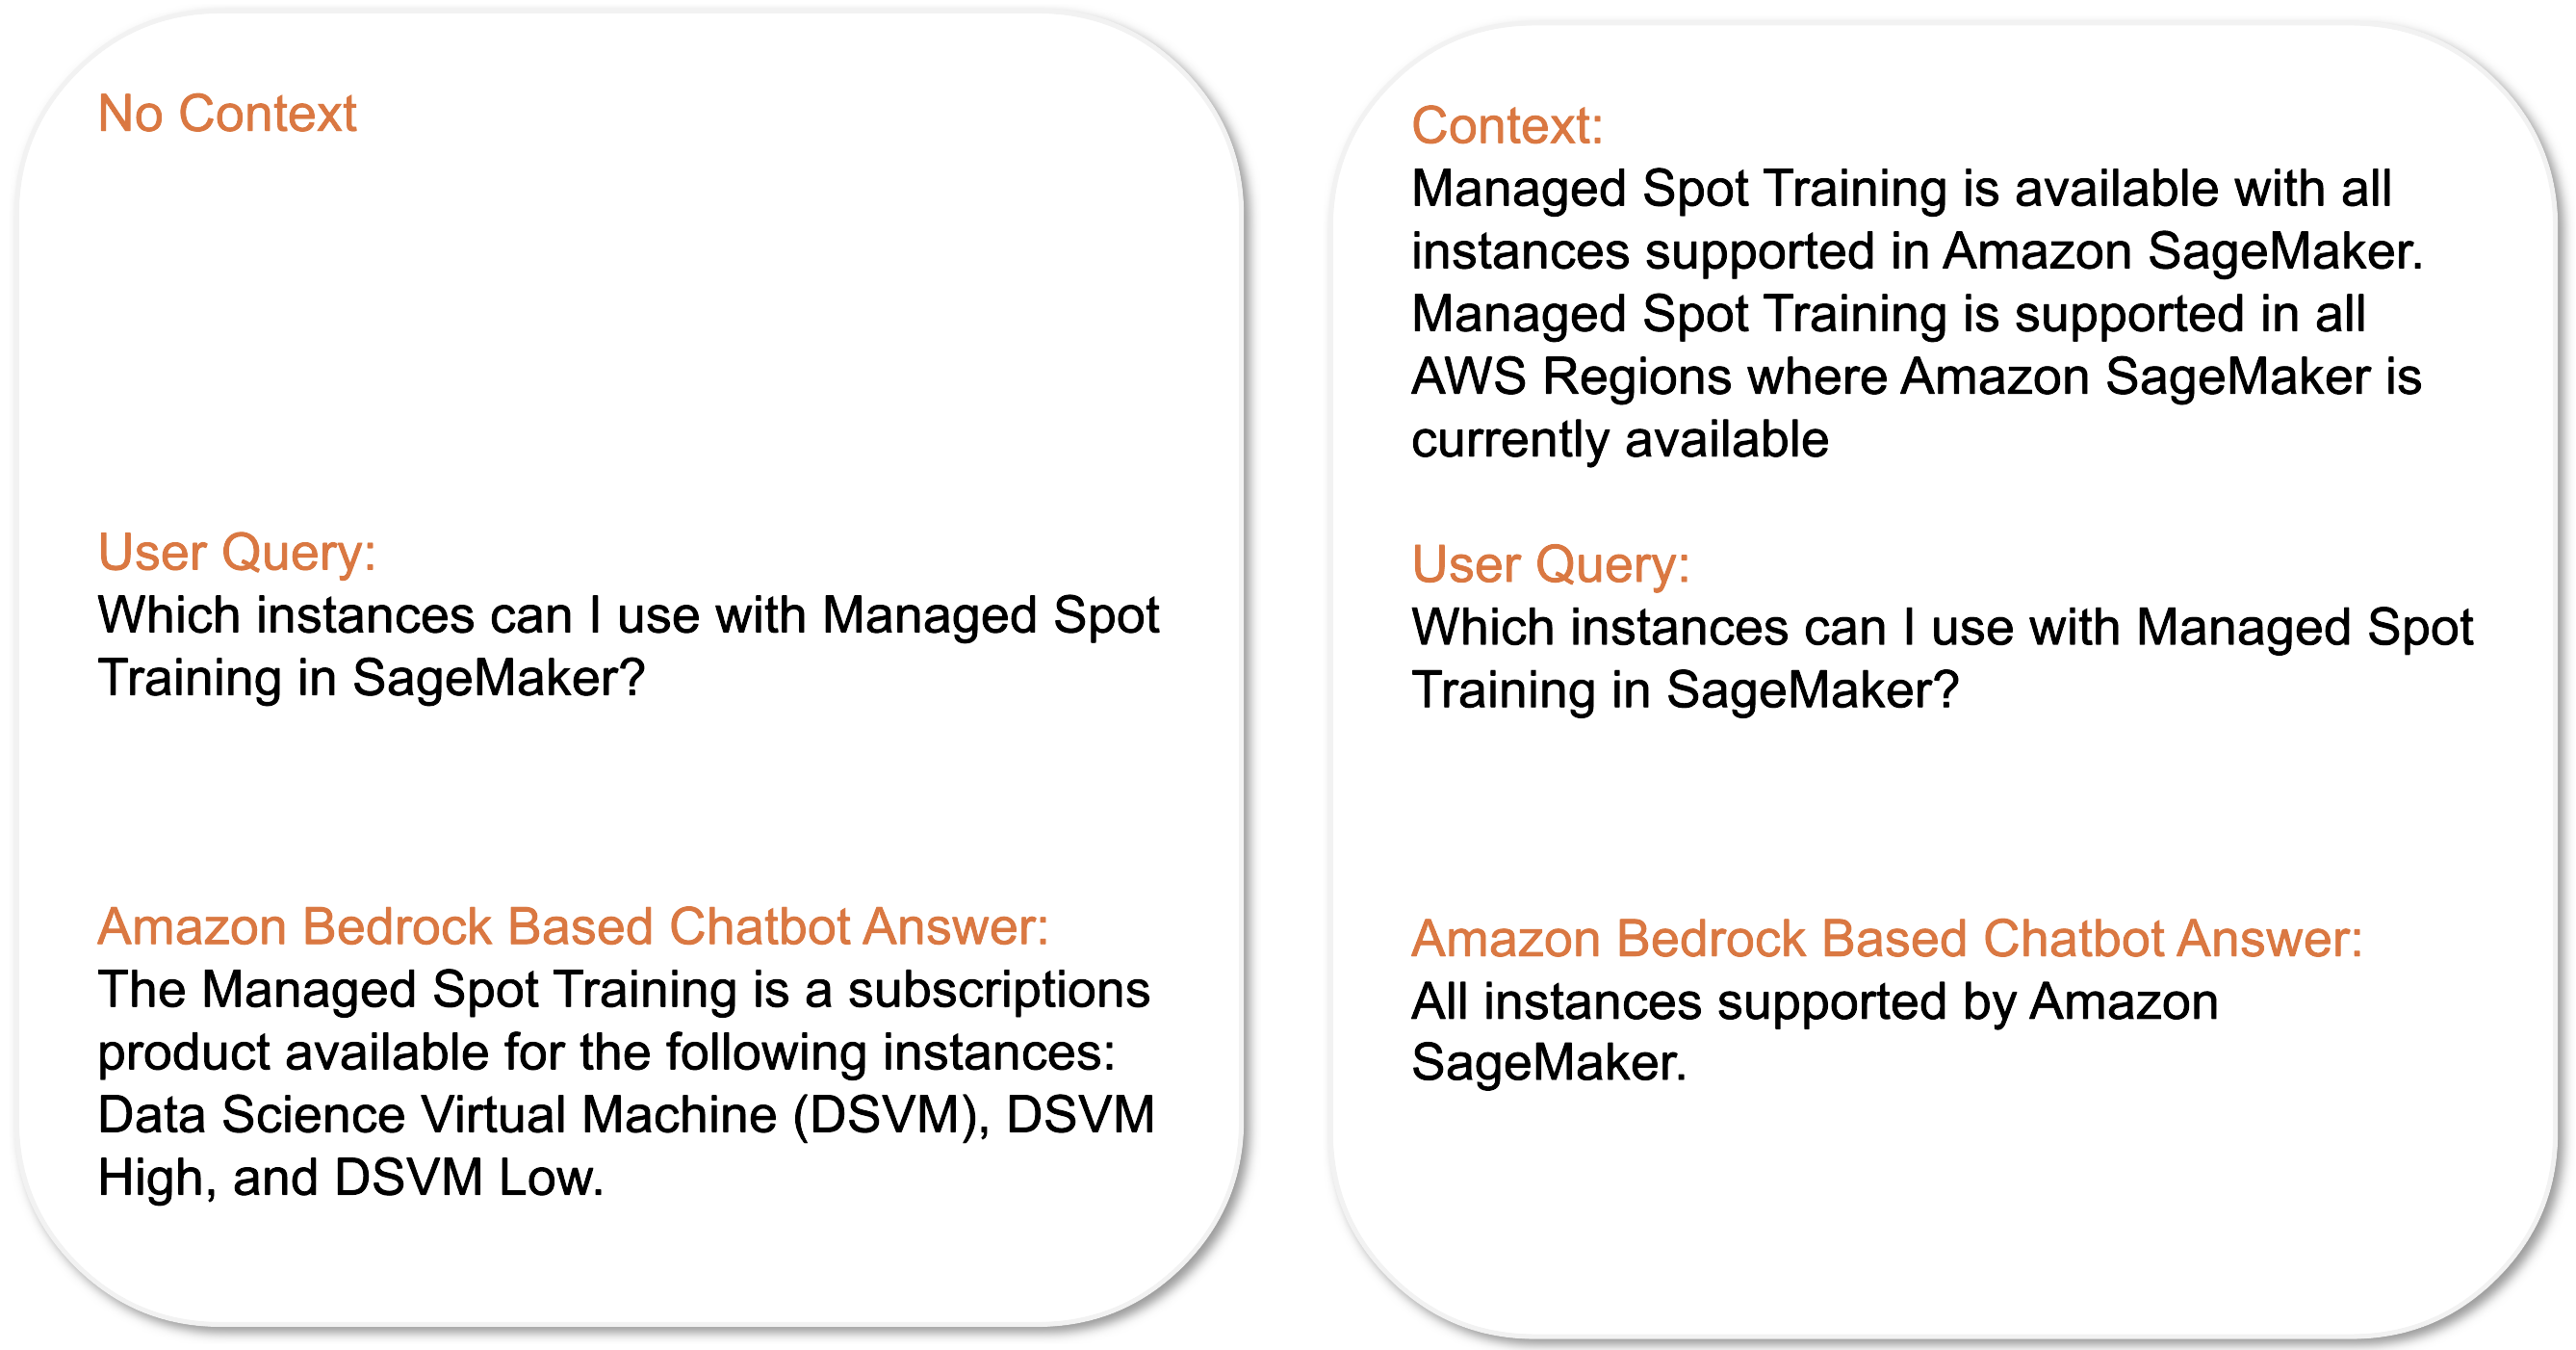

## When to Use RAG

The approach selection is influenced by three key business factors: the need for domain-specific solutions, access to current information, and the extent of required domain adaptation.



---



While there are several technical considerations, they generally fall under cost, effort, and technical expertise.

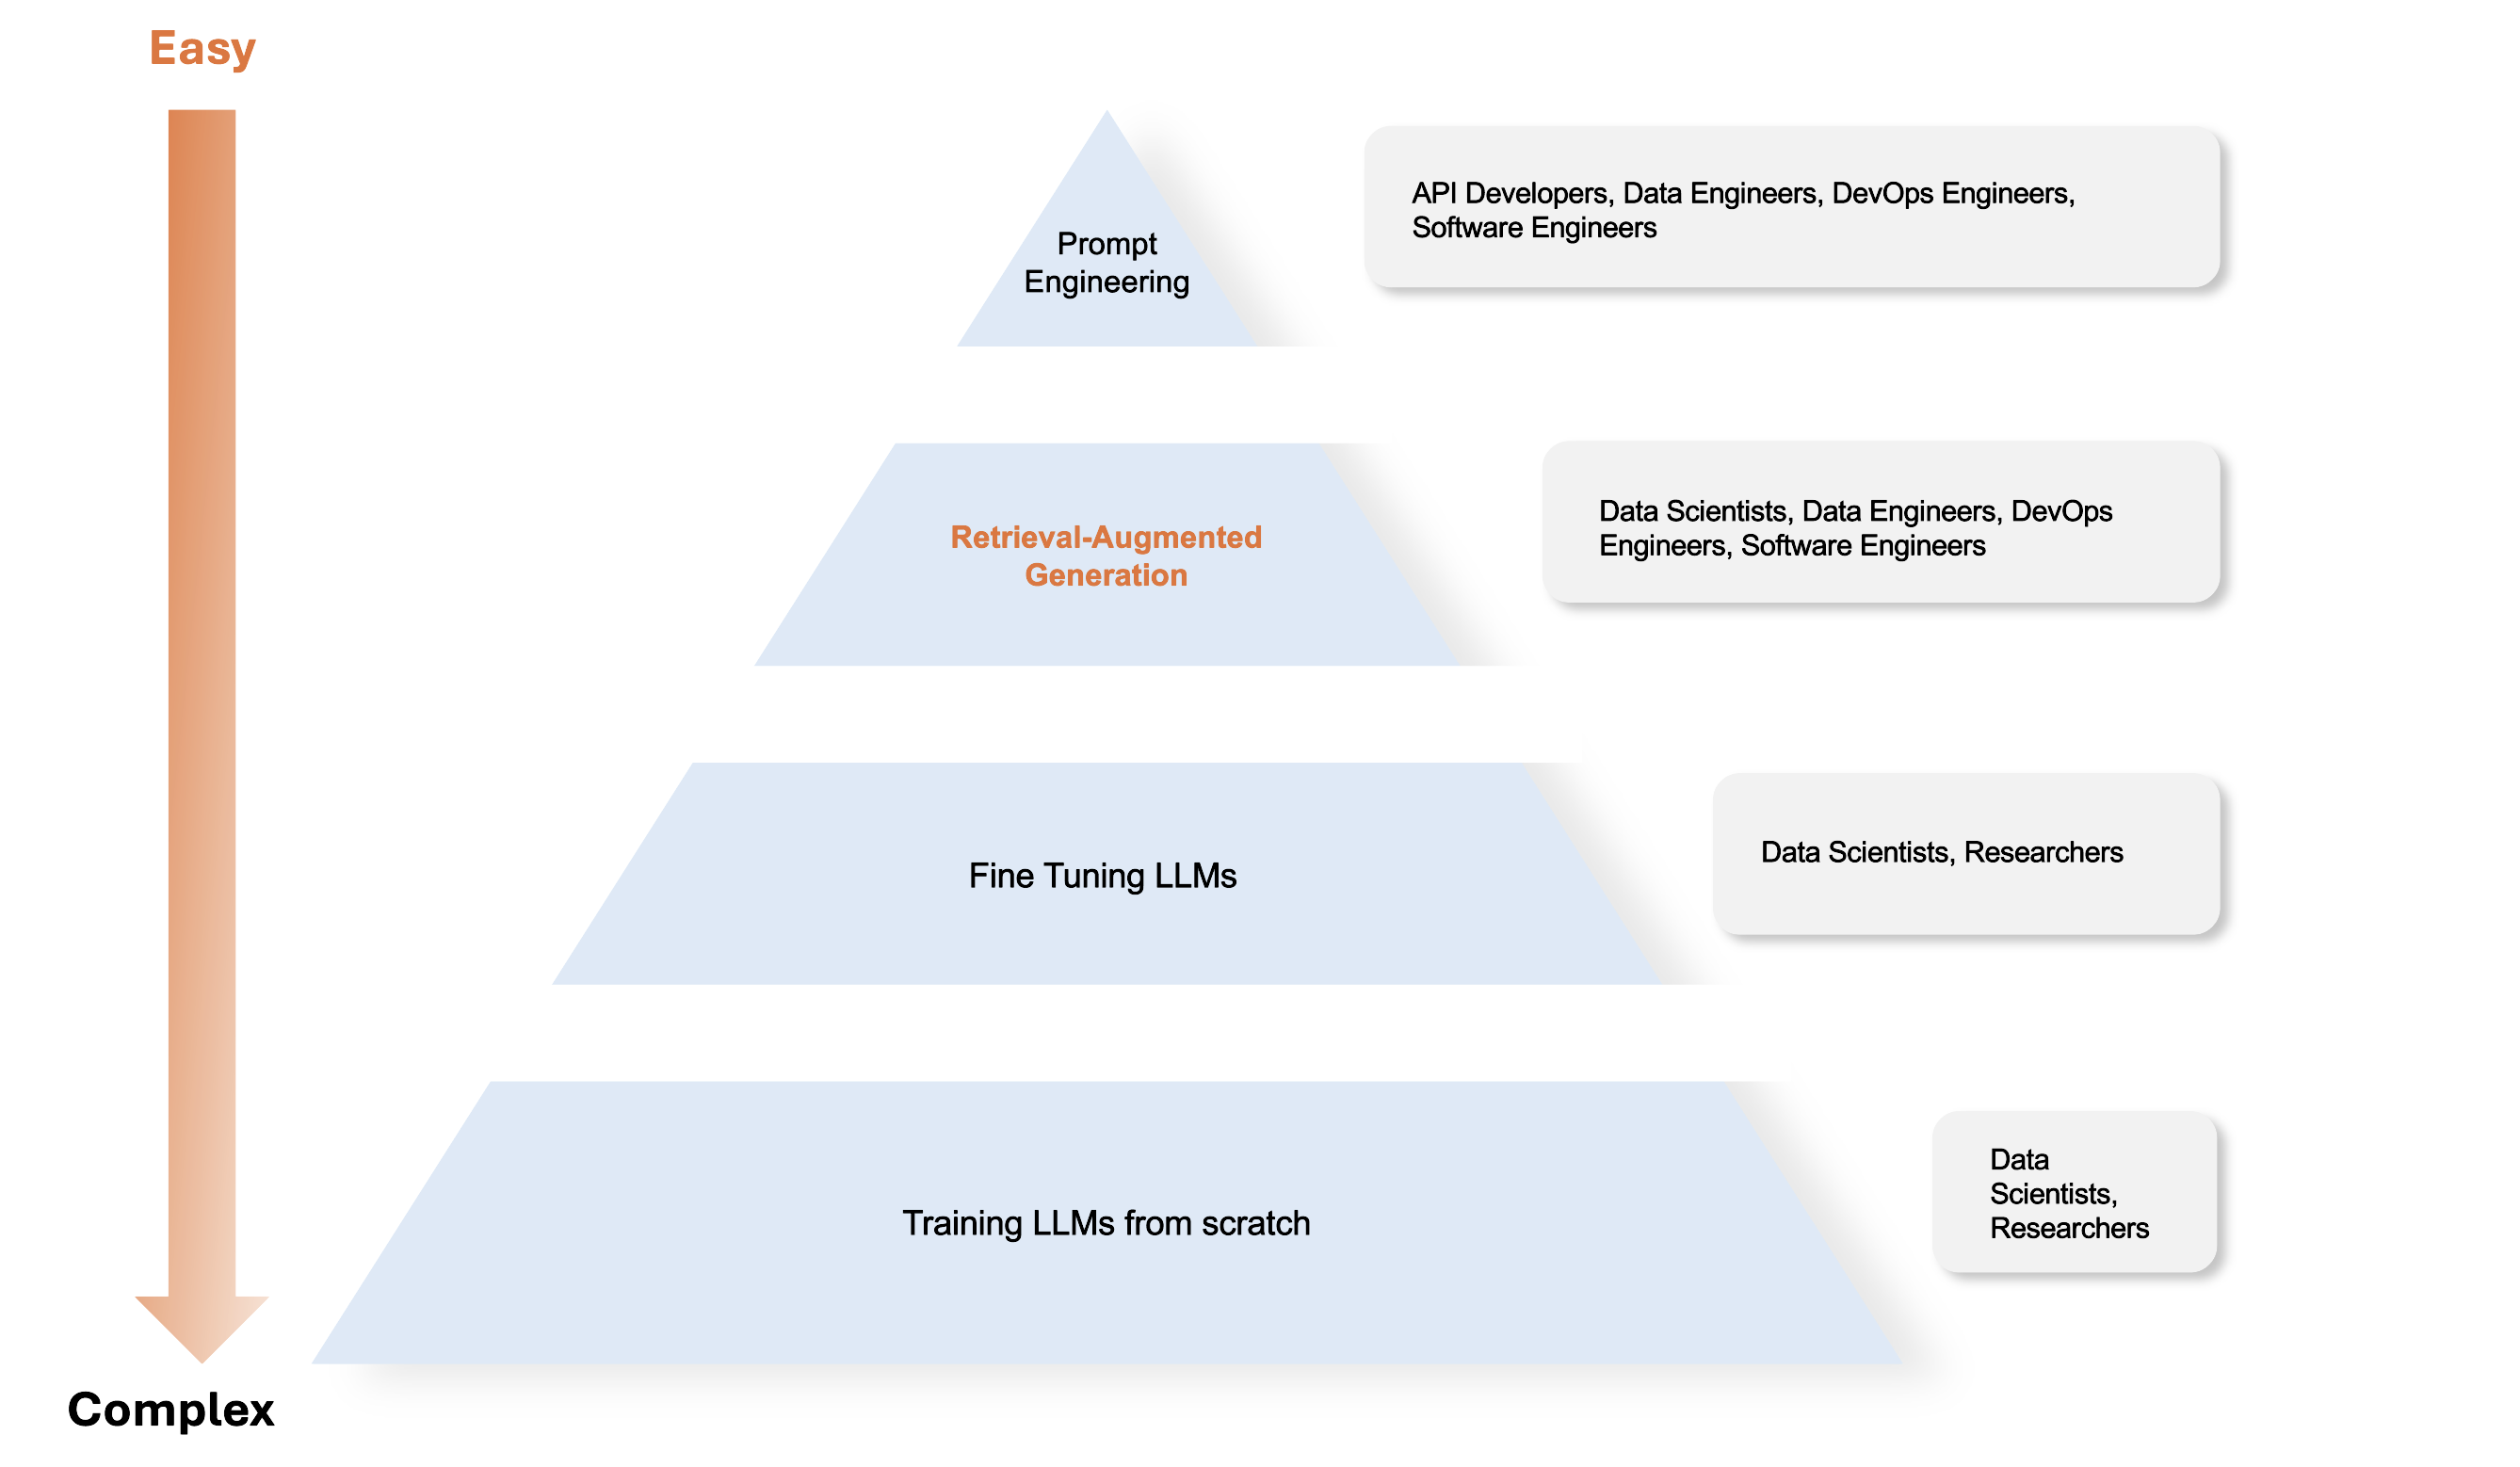

## When to use RAG (OPINION)
I have created a guideline that help me navigate with this exact question on a daily basis.

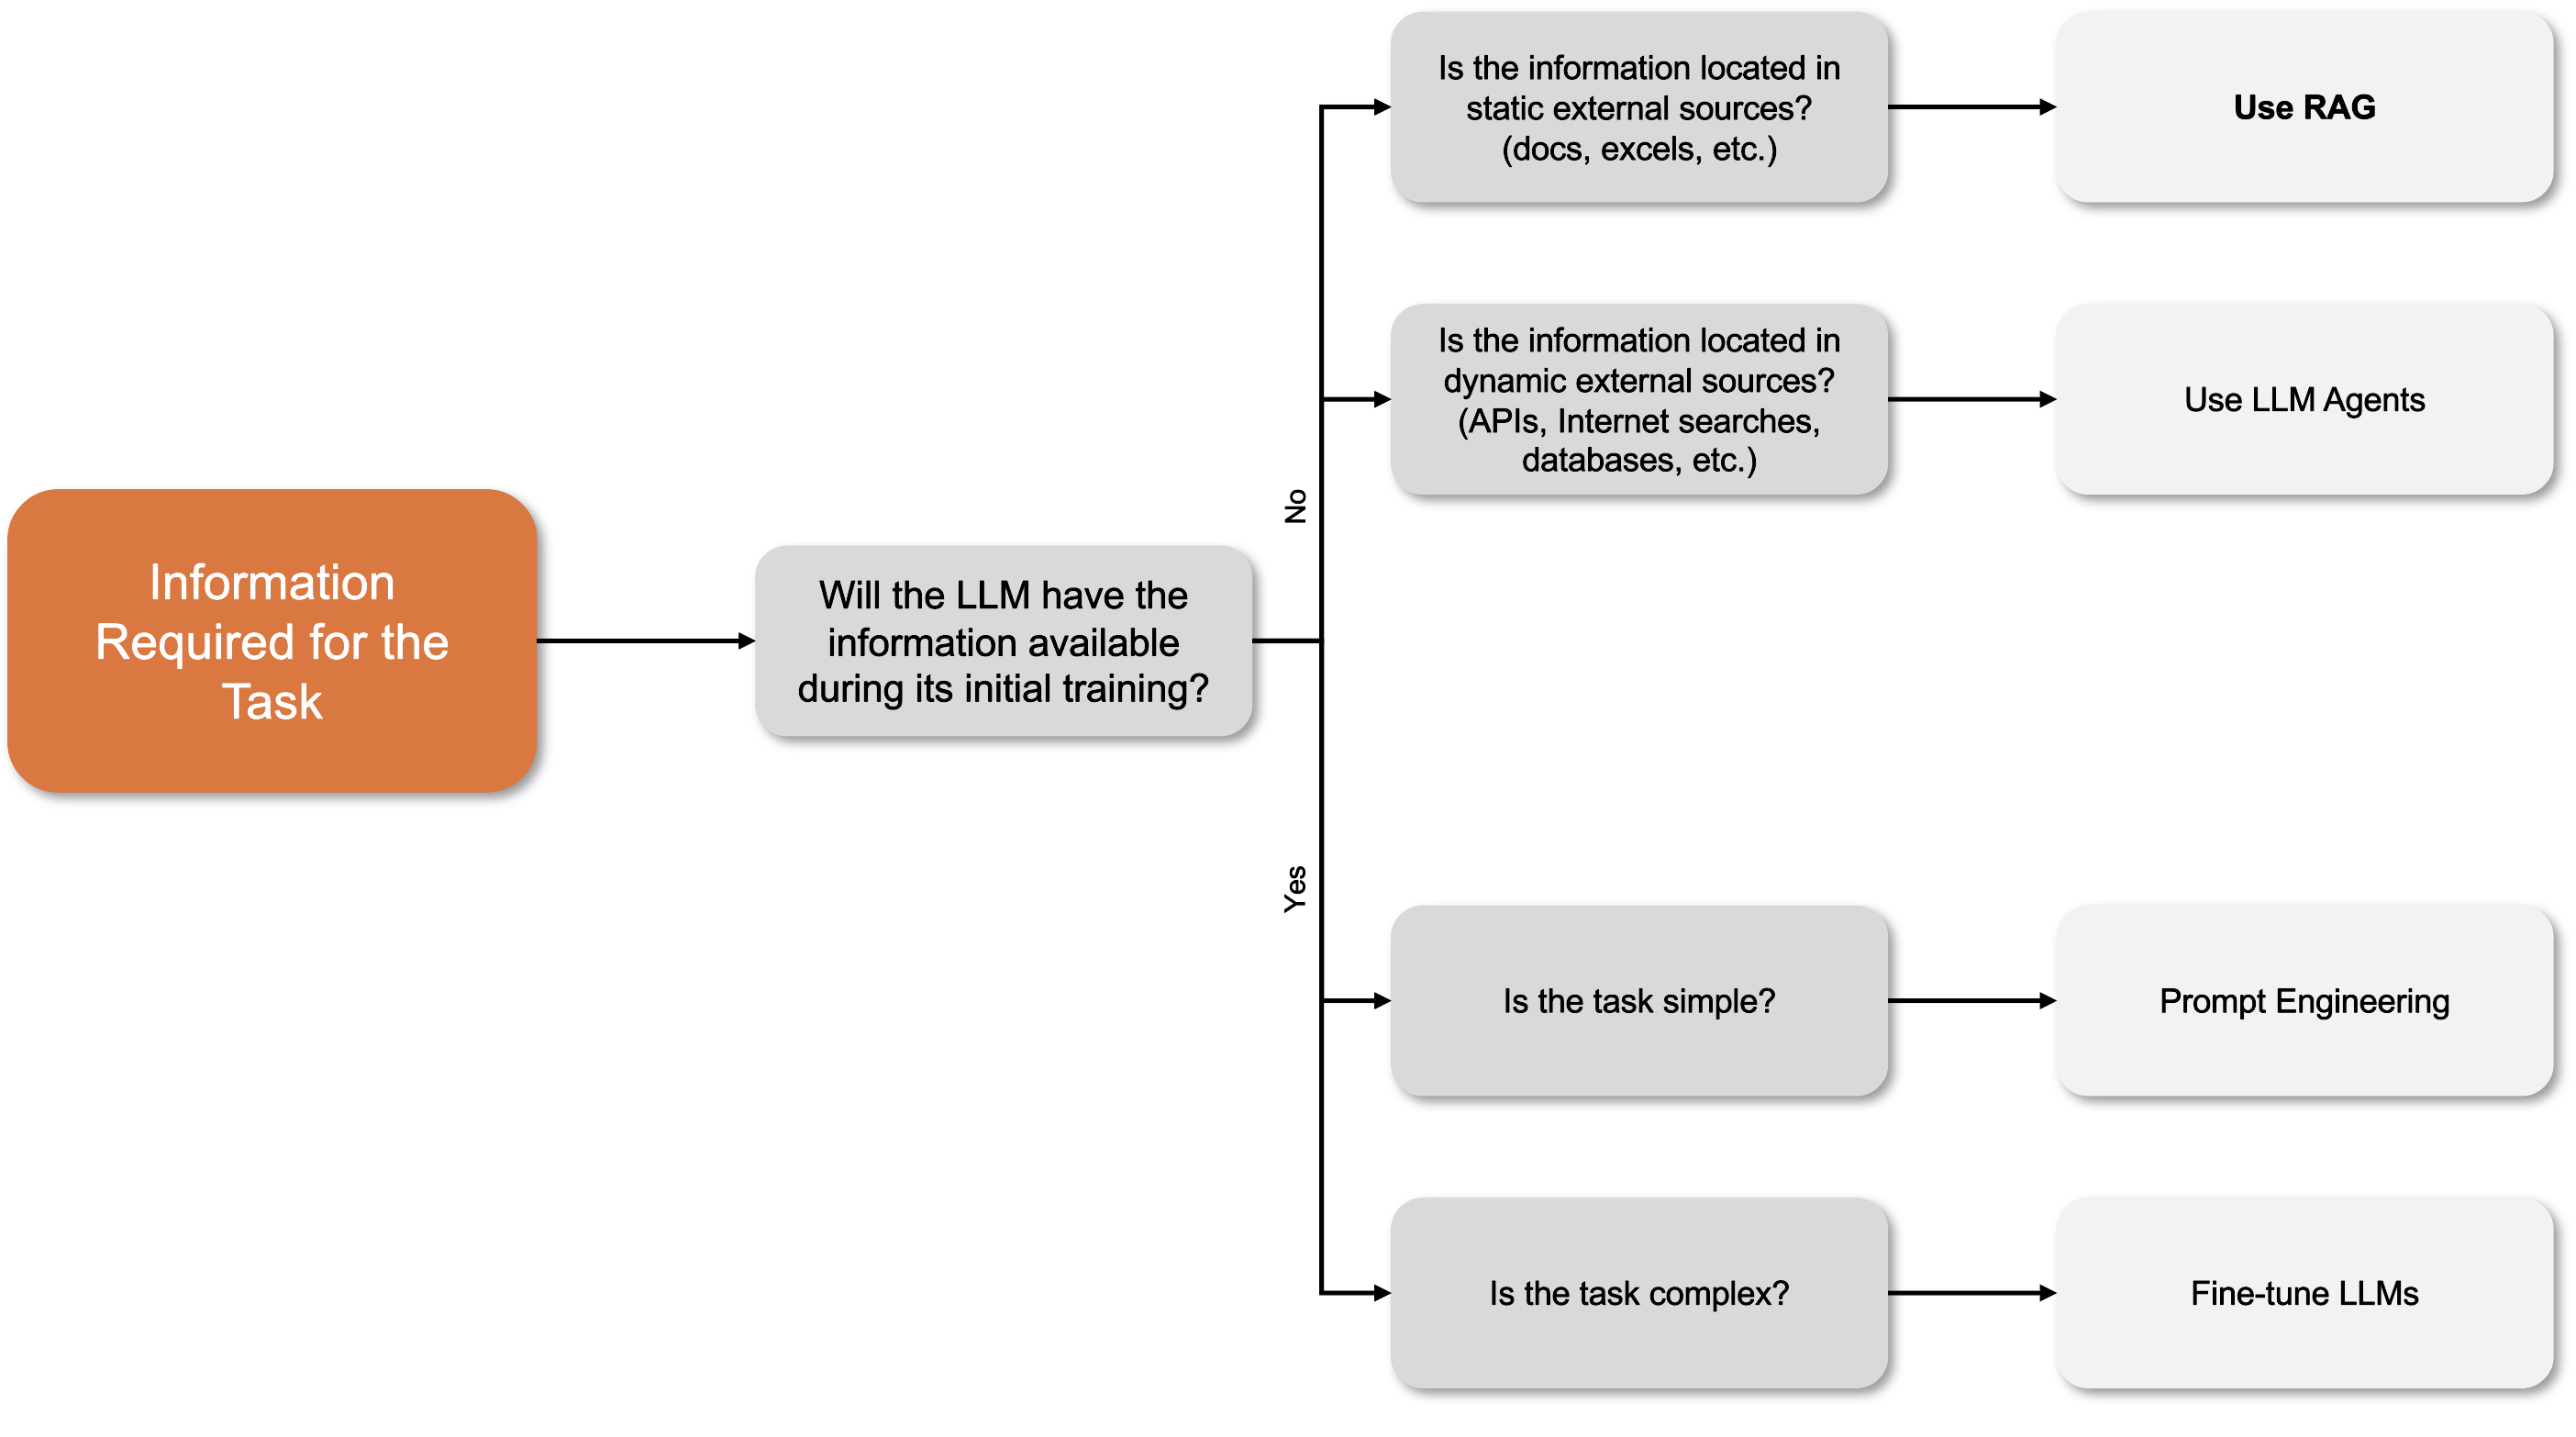

Notice how training an LLM model from scratch is not in the guidelines altogether. Unless you are doing research, training an LLM model from scratch should be the last resort.

It is too cost and effort intensive and you will not get to know the performance until the training has been completed.

Let’s take a couple of scenarios and understand how this guideline can be implemented.

**Scenario 1:** You want to use LLMs to generate medical diagnosis using medical records

Will the LLM have the information available during its initial training? Most large language models are trained on a variety of easily available public data. Medical datasets are easily available and shared on public mirrors such as Kaggle, Hugging Face Datasets, etc. So, yes, the LLM will have the information available during its initial training.

Is the task simple? No.

Is the task complex? Yes. So, we fine-tune LLMs.

**Scenario 2:** You want to develop a chatbot that helps your team access all company policy documents and answers any related questions.

Will the LLM have the information available during its initial training? No, the LLM will not have the information available during its initial training, as this a company-specific data which is most probably not public

Is the information located in static external sources? (docs, excels, etc.)? Yes. These documents (whilst not entirely static) rarely change. So, we will use RAG.

## Deep-dive into RAG

Retrieval-augmented generation (RAG) combines two cutting-edge technologies: information retrieval (IR) and natural language generation (NLG), or text generation.

To appreciate the innovation RAG offers, it’s essential to understand the complex interaction between these two elements.

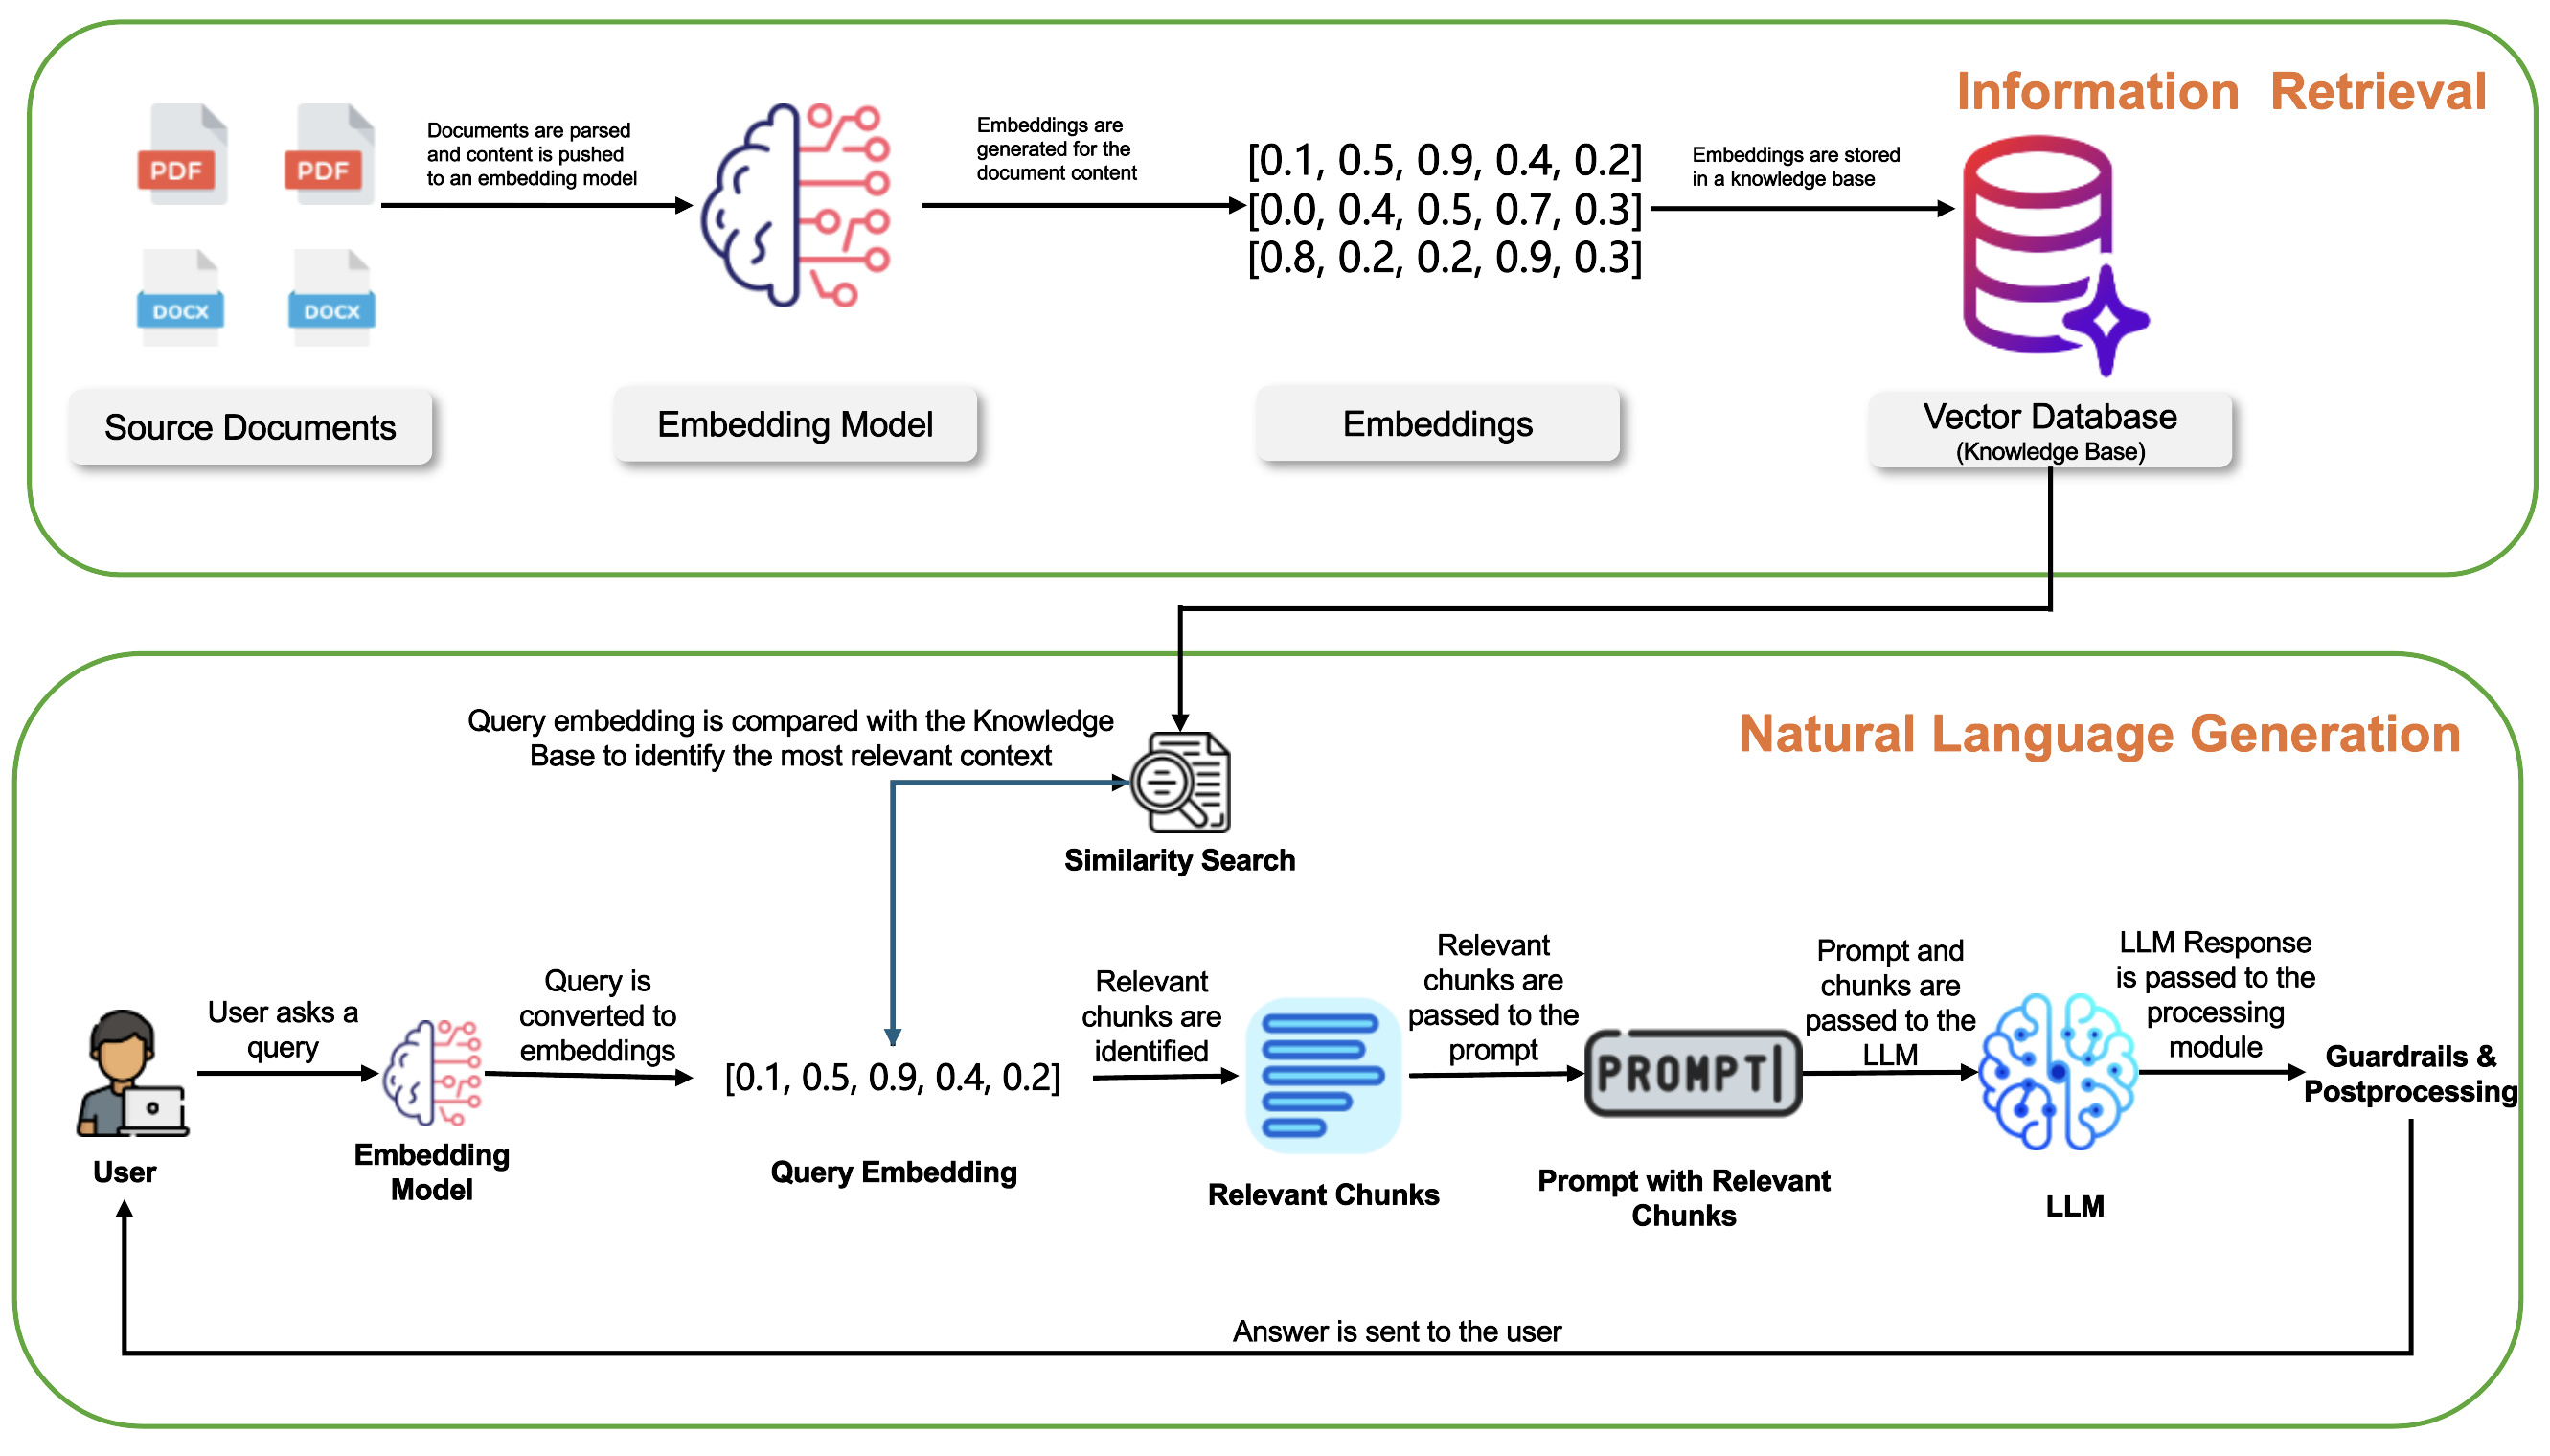

### Information Retrieval – the quest for relevance:


1. **Document Preparation**: Source documents (e.g., PDFs, DOCX files) are selected for processing.

2. **Embedding Generation**: The documents' content are converted into numerical representations (embeddings) using an advanced embedding model. These embeddings capture the meaning and context of the content.

3. **Knowledge Base Creation**: The generated embeddings are stored in a vector database, also known as a knowledge base.

4. **Query Embedding**: When a user submits a query, it is transformed into an embedding using the same embedding model.

5. **Similarity Search**: The query embedding is compared against the embeddings in the knowledge base to identify the most relevant data chunks.

6. **Information Retrieval**: The system retrieves and presents the most relevant information aligned with the user's query's intent.



To be effective in business applications, the IR system incorporates an understanding of industry-specific terminology and nuances.

### Natural Language Generation – the art of articulation:


1. **Information Integration**: Retrieved data chunks are combined with the user’s query to form a detailed prompt.

2. **Input to Language Model**: The detailed prompt is fed into a large language model (LLM).

3. **Response Generation**: The LLM generates a well-structured, contextually rich, and human-like response by synthesizing the information.

4. **Post-Processing**: The generated response undergoes refinement to enhance quality, clarity, and relevance.

5. **Guardrail Filtering**: The response is filtered through predefined guardrails to ensure adherence to standards of accuracy, insight, and user-friendliness.

6. **Response Delivery**: The polished and insightful response is presented to the user, delivering a seamless and enriching experience.

## Challenges of RAG

* **Managing multiple data sources:** Integrating and maintaining various structured and unstructured data sources can be complex, requiring consistent updates and handling of disparate formats.

* **Creating vector embeddings for large volumes of data:** Generating vector embeddings for large datasets is computationally intensive, requiring significant processing power and memory resources.

* **Incremental updates to vector store:** Continuously updating the vector store with new data while maintaining data consistency and minimizing downtime can be challenging.


* **Scaling retrieval mechanism:** As data grows, efficiently scaling the retrieval system to maintain fast and accurate results becomes difficult without sophisticated indexing and infrastructure.

* **Orchestration:** Coordinating various components like model inference, retrieval, and ranking in a seamless pipeline requires effective orchestration.

* **Ethical considerations - bias and fairness:** Ensuring the retrieval and generation processes are free from bias and uphold fairness is crucial to avoid ethical concerns.

* **Observability and performance monitoring:** Maintaining clear visibility into the system’s performance and quickly identifying and addressing bottlenecks or failures is essential for smooth LLM operations.

## Some Interesting Links

* https://huggingface.co/spaces/mteb/leaderboard
* https://benchmark.vectorview.ai/vectordbs.html
* https://arxiv.org/html/2407.08275v1
* https://docs.chainlit.io/get-started/overview

# Tangent: PromptTemplate vs Prompt

Think f-strings for prompts!

### The Simple Analogy

Imagine you are sending a text message.

  * A **Prompt** is like writing and sending a single, specific text message: `"Hey John, can you meet at 7 PM?"`
  * A **PromptTemplate** is like creating a text message template with blanks: `"Hey {name}, can you meet at {time}?"`

You can reuse the template over and over by just filling in the blanks for different people and times.

<br>

-----

<br>


A **prompt** is a direct, one-time instruction you give to an AI. It’s static and used for a single task.



A **prompt template** is a reusable blueprint for creating prompts. It has placeholders (variables) that you can fill in automatically. This makes it flexible and great for repeating the same kind of task.


Let's say you have a template like this:
`"Give me three fun facts about the planet {planet_name}."`

You can use this single template to automatically generate many different prompts:

1.  Fill `{planet_name}` with "Mars" $\rightarrow$ Get the prompt: `"Give me three fun facts about the planet Mars."`
2.  Fill `{planet_name}` with "Jupiter" $\rightarrow$ Get the prompt: `"Give me three fun facts about the planet Jupiter."`

# LangChain

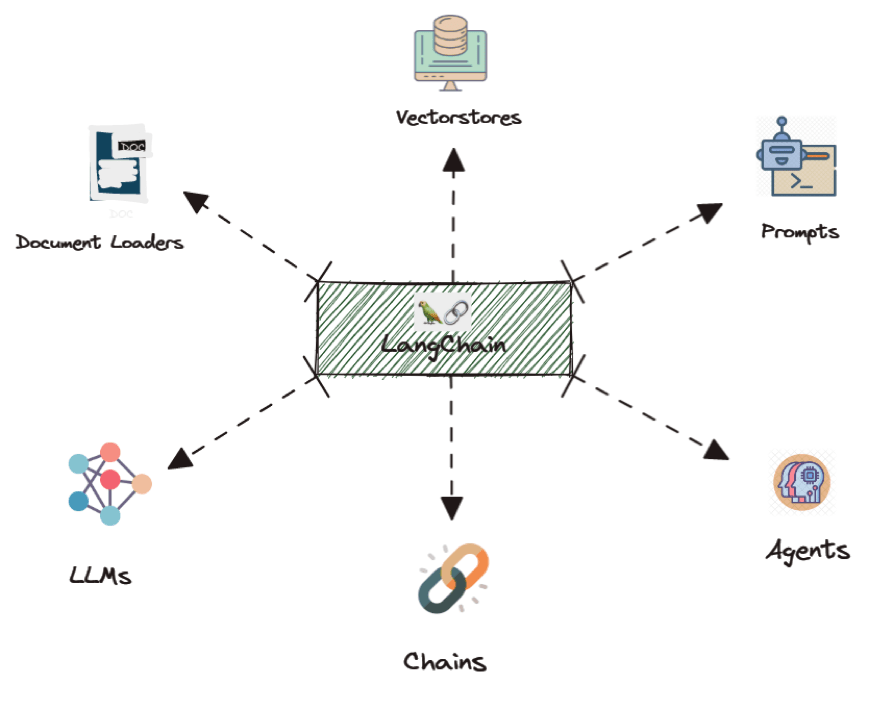

## Setting up the LLM

In [ ]:
!pip install --upgrade langchain
!pip install --upgrade langchain-core
!pip install --upgrade langchain-community
!pip install --upgrade langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
help(ChatGoogleGenerativeAI)

Help on class ChatGoogleGenerativeAI in module langchain_google_genai.chat_models:

class ChatGoogleGenerativeAI(langchain_google_genai._common._BaseGoogleGenerativeAI, langchain_core.language_models.chat_models.BaseChatModel)
 |  ChatGoogleGenerativeAI(*, name: Optional[str] = None, cache: Union[langchain_core.caches.BaseCache, bool, NoneType] = None, verbose: bool = <factory>, callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, tags: Optional[list[str]] = None, metadata: Optional[dict[str, Any]] = None, custom_get_token_ids: Optional[Callable[[str], list[int]]] = None, callback_manager: Optional[langchain_core.callbacks.base.BaseCallbackManager] = None, rate_limiter: Optional[langchain_core.rate_limiters.BaseRateLimiter] = None, disable_streaming: Union[bool, Literal['tool_calling']] = False, model: str, api_key: Optional[pydantic.types.SecretStr] = <factory>, credentials: Any = None, temperatu

In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

chat_model = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

#### First Test

In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage

# 1. Initialize the Chat Model (from the previous step)
chat_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

# 2. Prepare the messages
# The SystemMessage sets the behavior and context for the AI.
# The HumanMessage is the user's actual query.
messages = [
    SystemMessage(content="You're an assistant knowledgeable about healthcare. Only answer healthcare-related questions."),
    HumanMessage(content="What is Ayushman Bharat?"),
]

# 3. Invoke the model with the messages
result = chat_model.invoke(messages) # notice the similarity with model.predict from sklearn

print(result.content)

Ayushman Bharat is a flagship national health protection scheme launched by the Government of India in 2018. Its primary goal is to achieve Universal Health Coverage (UHC) and ensure that no one is left behind due to financial constraints when seeking healthcare.

The scheme has two main components:

1.  **Pradhan Mantri Jan Arogya Yojana (PMJAY):** This is the health insurance component, often referred to as the world's largest government-funded health insurance scheme.
    *   **Objective:** To provide financial protection to over 50 crore (500 million) poor and vulnerable families for secondary and tertiary care hospitalization.
    *   **Coverage:** It offers a health cover of up to ₹5 lakh (approximately $6,000 USD) per family per year for cashless and paperless treatment at empanelled public and private hospitals across India.
    *   **Benefits:** Covers pre-hospitalization expenses, hospitalization expenses, and post-hospitalization expenses for a wide range of medical and surg

In [ ]:
chat_model.invoke("What is blood pressure?")

AIMessage(content='Blood pressure is the **force of your blood pushing against the walls of your arteries** as your heart pumps it throughout your body.\n\nThink of your heart as a pump and your arteries as a network of hoses. When the pump pushes blood, it creates pressure inside the hoses. This pressure is essential to deliver oxygen and nutrients to all your organs and tissues.\n\n**How it\'s Measured (The Two Numbers):**\n\nBlood pressure is expressed as two numbers, typically written as a fraction (e.g., 120/80 mmHg):\n\n1.  **Systolic Pressure (the top number):** This is the higher number and represents the pressure in your arteries when your heart **beats** (contracts) and pushes blood out.\n2.  **Diastolic Pressure (the bottom number):** This is the lower number and represents the pressure in your arteries when your heart is **at rest** (between beats) and filling with blood.\n\nThe unit "mmHg" stands for millimeters of mercury, which is the standard unit for measuring pressure

#### Second Test

In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage

# 1. Initialize the Chat Model
chat_model = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

# 2. Prepare messages with an out-of-scope question
messages = [
    SystemMessage(content="You're an assistant knowledgeable about healthcare. Only answer healthcare-related questions."),
    HumanMessage(content="How do I change a tire?"),
]

# 3. Invoke the model
result = chat_model.invoke(messages)

print(result.content)

KeyboardInterrupt: 

## ChatPromptTemplate

A `ChatPromptTemplate` is a utility provided by `langchain_core` that is used to create structured templates for chat-based interactions with language models. It simplifies the process of defining, formatting, and managing prompts, especially when they involve placeholders for dynamic content.

### **Key Features of a ChatPromptTemplate**
1. **Template Structure**:
   - It uses a predefined text structure with placeholders (e.g., `{context}`, `{question}`) that can be dynamically replaced with specific input data.
   - This helps standardize how prompts are created, ensuring consistency across interactions.

2. **Dynamic Content Insertion**:
   - Placeholders in the template are substituted with actual values when the `.format()` method is called.
   - For example, `{context}` might be replaced with user input or preprocessed data.

3. **Ease of Reuse**:
   - Once defined, a `ChatPromptTemplate` can be reused multiple times with different inputs, making it efficient for workflows requiring repeated formatting.

4. **Error Handling**:
   - Ensures placeholders are properly substituted and avoids missing or malformed prompts.

5. **Integration with Language Models**:
   - Templates are often used as the initial input to language models, providing clear instructions or context for generating responses.

---

### **Components of a ChatPromptTemplate**
1. **Template String**:
   - A string containing instructions, examples, or structure, with placeholders for dynamic content.
   - Example:
     ```python
     template_str = "Use the following information to answer the question:\n\n{context}\n\nQuestion: {question}"
     ```

2. **Dynamic Placeholders**:
   - Named variables enclosed in `{}`.
   - These will be replaced with actual values at runtime using the `.format()` method.

3. **Formatting Method**:
   - `format()` dynamically replaces placeholders with provided values.
   - Example:
     ```python
     formatted_prompt = template_str.format(context="Sample context", question="What is the context about?")
     ```

### **Why Use ChatPromptTemplate?**
- **Scalability**: Handle complex prompts with multiple inputs.
- **Reusability**: Reuse templates in different parts of an application.
- **Clarity**: Keep the prompt structure organized and consistent.
- **Flexibility**: Adapt to various use cases like summarization, QA systems, or chatbot interactions.

In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# 1. Initialize the Chat Model
chat_model = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

# 2. Create the Prompt Template
instruction_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions. Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

Context: {context}

Question: {question}
"""

review_template = ChatPromptTemplate.from_template(instruction_str)

# 3. Define the context and question
context = "The discharge process was seamless!"
question = "Did anyone have a positive experience?"

# 4. Create the chain by piping the components together
#    We also add an output parser to get a clean string result.
chain = review_template | chat_model | StrOutputParser()

# 5. Invoke the chain with the input variables
result = chain.invoke({
    "context": context,
    "question": question
})

print(result)

KeyboardInterrupt: 

## Chains

The chaining process:
 - `review_prompt_template`: Generates a formatted prompt using the input variables (e.g., `context` and `question`).
 - `chat_model`: Sends the formatted prompt to the specified Gemini chat model for generating a response.
 - `output_parser`: Processes the raw output from the chat model and ensures it is returned as a clean string.

 The `|` operator acts as a pipeline, automatically passing the output of one step (e.g., formatted prompt)  as the input to the next (e.g., chat model and then output parser). This simplifies the workflow for generating responses from the chat model with structured input and output handling.

## Using PromptTemplates & MessageTemplates

In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import (
    PromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate
)
from langchain_core.output_parsers import StrOutputParser

# 1. Initialize the Chat Model
chat_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

# 2. Create the detailed prompt templates
instruction_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

Context: {context}
"""

review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"], template=instruction_str
    )
)

review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"], template="{question}"
    )
)

messages = [review_system_prompt, review_human_prompt]

# This is our final, reusable prompt template
review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],
    messages=messages,
)

# 3. Define the context and question
context = "I had a great stay!"
question = "Did anyone have a positive experience?"

# 4. Create the chain
chain = review_prompt_template | chat_model | StrOutputParser()

# 5. Invoke the chain
result = chain.invoke({
    "context": context,
    "question": question
})

print(result)

Yes, one patient stated, "I had a great stay!"


In [ ]:
context = "I had a negative stay!"
question = "Did anyone have a positive experience?"

chain.invoke({"context": context, "question": question})

'Based on the provided context, it only states, "I had a negative stay!" There is no information about anyone having a positive experience.'

# Adding RAG

In [ ]:
!pip install -U langchain-chroma # FAISS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510.8 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.7 MB/s eta 0:0

In [ ]:
import time
from google.colab import userdata

# Import the CSVLoader class to load documents from a CSV file.
from langchain.document_loaders.csv_loader import CSVLoader

# Import the Chroma class, which is used to create and interact with a Chroma vector database.
from langchain_chroma import Chroma

# Import the GoogleGenerativeAIEmbeddings class to create numerical vector representations (embeddings) of text using Google's models.
from langchain_google_genai import GoogleGenerativeAIEmbeddings


REVIEWS_CSV_PATH = "/content/reviews.csv"

# Define a constant variable for the directory where the Chroma vector database will be stored.
REVIEWS_CHROMA_PATH = "chroma_data"


# Create an instance of the CSVLoader.
loader = CSVLoader(
    file_path=REVIEWS_CSV_PATH,  # Specify the path to the CSV file to be loaded.
    source_column="review"       # Specify the name of the column that contains the main text content.
)

# Call the .load() method on the loader instance.
# This reads the specified column from the CSV file and loads the content into a list of Document objects.
reviews = loader.load()

# Specify the embedding function to use. We define it once to be reused.
embedding_function = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",  # Choose the specific embedding model provided by Google.
    google_api_key=userdata.get('GOOGLE_API_KEY')  # Securely fetch the Google API key.
)

# Set the size of each batch to process.
batch_size = 20
# Calculate the total number of batches.
num_batches = (len(reviews) - 1) // batch_size + 1
reviews_vector_db = None

# Loop through the documents in batches to avoid hitting the API's rate limit.
for i in range(0, len(reviews), batch_size):
    # Get the current batch of documents.
    batch_docs = reviews[i:i + batch_size]
    current_batch_num = i // batch_size + 1

    print(f"Processing batch {current_batch_num}/{num_batches}...")

    if i == 0:
        # For the first batch, create a new Chroma vector database.
        # The `from_documents` method handles the entire process of embedding and storing the data.
        reviews_vector_db = Chroma.from_documents(
            documents=batch_docs,  # Pass the list of Document objects that need to be embedded.
            embedding=embedding_function,
            # Specify the directory on the disk where the vector database will be saved.
            # This makes the database persistent, so we can load it directly in the future.
            persist_directory=REVIEWS_CHROMA_PATH
        )
    else:
        # For subsequent batches, add the documents to the existing database.
        reviews_vector_db.add_documents(documents=batch_docs)

    # Pause the script for 30 seconds after each batch to respect the per-minute rate limit.
    print(f"Batch {current_batch_num} processed. Waiting for 30 seconds...")
    time.sleep(30)

print("Vector database created successfully and saved to the specified directory.")

Processing batch 1/51...
Batch 1 processed. Waiting for 30 seconds...
Processing batch 2/51...
Batch 2 processed. Waiting for 30 seconds...
Processing batch 3/51...
Batch 3 processed. Waiting for 30 seconds...
Processing batch 4/51...
Batch 4 processed. Waiting for 30 seconds...
Processing batch 5/51...
Batch 5 processed. Waiting for 30 seconds...
Processing batch 6/51...
Batch 6 processed. Waiting for 30 seconds...
Processing batch 7/51...
Batch 7 processed. Waiting for 30 seconds...
Processing batch 8/51...
Batch 8 processed. Waiting for 30 seconds...
Processing batch 9/51...
Batch 9 processed. Waiting for 30 seconds...
Processing batch 10/51...
Batch 10 processed. Waiting for 30 seconds...
Processing batch 11/51...
Batch 11 processed. Waiting for 30 seconds...
Processing batch 12/51...
Batch 12 processed. Waiting for 30 seconds...
Processing batch 13/51...
Batch 13 processed. Waiting for 30 seconds...
Processing batch 14/51...
Batch 14 processed. Waiting for 30 seconds...
Processing

KeyboardInterrupt: 

## Retrieval

In [ ]:
question = """Has anyone complained about communication with the hospital staff?"""
relevant_chunks = reviews_vector_db.similarity_search(question, k=3)

relevant_chunks[0].page_content

"review_id: 707\nvisit_id: 4533\nreview: I encountered some issues with the nursing staff's communication. It seemed like there was a lack of coordination, leading to confusion about my medication schedule and treatment plan.\nphysician_name: Joseph Gonzales\nhospital_name: Brown-Golden\npatient_name: Makayla Reynolds"

In [ ]:
relevant_chunks[1].page_content

'review_id: 73\nvisit_id: 7696\nreview: I had a frustrating experience at the hospital. The communication between the medical staff and me was unclear, leading to misunderstandings about my treatment plan. Improvement is needed in this area.\nphysician_name: Maria Thompson\nhospital_name: Little-Spencer\npatient_name: Terri Smith'

In [ ]:
relevant_chunks[2].page_content

'review_id: 1001\nvisit_id: 3240\nreview: I was disappointed with the lack of communication between different departments in the hospital. It led to confusion about my treatment plan and discharge instructions.\nphysician_name: Ronald Hernandez Jr.\nhospital_name: Wallace-Hamilton\npatient_name: Jacob Smith'

In [ ]:
from langchain.schema.runnable import RunnablePassthrough  # Allows passing inputs through unchanged in a pipeline
from langchain_core.output_parsers import StrOutputParser  # Parses the model's output into a clean string

# Create a retriever to fetch the top 10 most relevant reviews based on a query
reviews_retriever = reviews_vector_db.as_retriever(k=10)
# The `as_retriever` method converts the database into a retriever.
# `k=10` specifies that the retriever should return the top 10 most relevant documents for a query.

# Create a chain for querying and generating responses
review_chain = (
    {"context": reviews_retriever, "question": RunnablePassthrough()}
    # Step 1: Retrieves relevant reviews (`context`) and passes the `question` unchanged
    | review_prompt_template
    # Step 2: Formats the retrieved reviews and the user's question into a structured prompt
    | chat_model
    # Step 3: Sends the prompt to the Gemini chat model to generate a response
    | StrOutputParser()
    # Step 4: Parses the model's raw output into a clean string format for easier use
)

In [ ]:
question = """Has anyone complained about communication with the hospital staff?"""
review_chain.invoke(question)

"Yes, several patients have complained about communication with the hospital staff:\n\n*   **Makayla Reynolds** (review_id: 707) encountered issues with the nursing staff's communication, noting a lack of coordination that led to confusion about her medication schedule and treatment plan.\n*   **Terri Smith** (review_id: 73) had a frustrating experience due to unclear communication between the medical staff and herself, leading to misunderstandings about her treatment plan.\n*   **Jacob Smith** (review_id: 1001) was disappointed with the lack of communication between different departments, which caused confusion about his treatment plan and discharge instructions.\n*   **Daniel Harris** (review_id: 954) reported that his experience was less than satisfactory because the communication among the staff was poor, leading to confusion about his treatment plan."

# Putting it all together

In [ ]:
from langchain.prompts import (
    PromptTemplate,  # Template for formatting prompts with dynamic variables
    SystemMessagePromptTemplate,  # Represents a system-level instruction to the model
    HumanMessagePromptTemplate,  # Represents a human-level input for the model
    ChatPromptTemplate,  # Combines multiple prompt components into a unified chat prompt
)

# Define the system prompt template as a string with placeholders for dynamic content
review_template_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

{context}
"""

# Create a system-level message prompt template for the chatbot
review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"],  # Placeholder for the "context" (e.g., patient reviews)
        template=review_template_str,  # The instructions and structure of the system prompt
    )
)

# Create a human-level message prompt template for user input
review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"],  # Placeholder for the "question" to be answered
        template="{question}",  # A simple template where the "question" is dynamically inserted
    )
)

# Combine the system and human prompts into a list of messages
messages = [review_system_prompt, review_human_prompt]

# Create a chat prompt template that integrates the system and human prompts
review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],  # Define the expected inputs for the template
    messages=messages,  # Combine the individual prompt components (system and human)
)

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
chat_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

In [ ]:
# Importing required modules and classes
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import (
    PromptTemplate,  # Template for structuring prompts
    SystemMessagePromptTemplate,  # System-level instructions for the model
    HumanMessagePromptTemplate,  # Human input instructions for the model
    ChatPromptTemplate,  # Combines system and human prompts into a single chat prompt
)
from langchain_core.output_parsers import StrOutputParser  # Parses the model's output into a clean string
from langchain_community.vectorstores import Chroma  # Vector database for efficient similarity searches
from langchain_google_genai import GoogleGenerativeAIEmbeddings  # Converts text to embeddings using Google's API
from langchain.schema.runnable import RunnablePassthrough  # Allows passing inputs through unchanged in a pipeline

# Path to the persistent Chroma vector database
REVIEWS_CHROMA_PATH = "chroma_data"

# Specify the embedding function to use. We define it once to be reused.
embedding_function = GoogleGenerativeAIEmbeddings(
    model="models/embedding-001",  # Choose the specific embedding model provided by Google.
    google_api_key=userdata.get('GOOGLE_API_KEY')  # Securely fetch the Google API key.
)

# Set the size of each batch to process.
batch_size = 20
# Calculate the total number of batches.
num_batches = (len(reviews) - 1) // batch_size + 1
reviews_vector_db = None

# Loop through the documents in batches to avoid hitting the API's rate limit.
for i in range(0, len(reviews), batch_size):
    # Get the current batch of documents.
    batch_docs = reviews[i:i + batch_size]
    current_batch_num = i // batch_size + 1

    print(f"Processing batch {current_batch_num}/{num_batches}...")

    if i == 0:
        # For the first batch, create a new Chroma vector database.
        # The `from_documents` method handles the entire process of embedding and storing the data.
        reviews_vector_db = Chroma.from_documents(
            documents=batch_docs,  # Pass the list of Document objects that need to be embedded.
            embedding=embedding_function,
            # Specify the directory on the disk where the vector database will be saved.
            # This makes the database persistent, so we can load it directly in the future.
            persist_directory=REVIEWS_CHROMA_PATH
        )
    else:
        # For subsequent batches, add the documents to the existing database.
        reviews_vector_db.add_documents(documents=batch_docs)

    # Pause the script for 60 seconds after each batch to respect the per-minute rate limit.
    print(f"Batch {current_batch_num} processed. Waiting for 30 seconds...")
    time.sleep(30)

print("Vector database created successfully and saved to the specified directory.")

Processing batch 1/51...


GoogleGenerativeAIError: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0 [violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerUserPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerUserPerProjectPerModel-FreeTier"
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
]

In [ ]:
# Create a retriever to fetch the top 10 most relevant reviews based on a query
reviews_retriever = reviews_vector_db.as_retriever(k=10)
# The `as_retriever` method converts the database into a retriever.
# `k=10` specifies that the retriever should return the top 10 most relevant documents for a query.

# Create a chain for querying and generating responses
review_chain = (
    {"context": reviews_retriever, "question": RunnablePassthrough()}
    # Step 1: Retrieves relevant reviews (`context`) and passes the `question` unchanged
    | review_prompt_template
    # Step 2: Formats the retrieved reviews and the user's question into a structured prompt
    | chat_model
    # Step 3: Sends the prompt to the OpenAI chat model to generate a response
    | StrOutputParser()
    # Step 4: Parses the model's raw output into a clean string format for easier use
)

AttributeError: 'NoneType' object has no attribute 'as_retriever'

In [ ]:
question = """Has anyone complained about communication with the hospital staff?"""
review_chain.invoke(question)

"Yes, several patients have complained about communication with the hospital staff:\n\n*   **Makayla Reynolds (review_id: 707)** encountered issues with the nursing staff's communication, noting a lack of coordination that led to confusion about her medication schedule and treatment plan.\n*   **Terri Smith (review_id: 73)** had a frustrating experience due to unclear communication between the medical staff and her, which led to misunderstandings about her treatment plan. She stated that improvement is needed in this area.\n*   **Jacob Smith (review_id: 1001)** was disappointed with the lack of communication between different departments in the hospital, which caused confusion about his treatment plan and discharge instructions.\n*   **Daniel Harris (review_id: 954)** reported that the communication among the staff was poor, leading to confusion about his treatment plan."

# Adding a UI

In [ ]:
!pip install gradio

In [ ]:
def respond_to_user_question(question: str, history: list) -> str:
    """
    Respond to a user's question using the review_chain.
    """
    return review_chain.invoke(question)

In [ ]:
respond_to_user_question("Has anyone complained about communication with the hospital staff?", [])

"Yes, several patients have complained about communication with the hospital staff:\n\n*   **Makayla Reynolds** (review_id: 707) encountered issues with the nursing staff's communication, noting a lack of coordination that led to confusion about her medication schedule and treatment plan.\n*   **Terri Smith** (review_id: 73) had a frustrating experience due to unclear communication between the medical staff and herself, leading to misunderstandings about her treatment plan.\n*   **Jacob Smith** (review_id: 1001) was disappointed with the lack of communication between different departments, which caused confusion about his treatment plan and discharge instructions.\n*   **Daniel Harris** (review_id: 954) reported that his experience was less than satisfactory because the communication among the staff was poor, leading to confusion about his treatment plan."

In [ ]:
import gradio as gr
# Create the Gradio ChatInterface
interface = gr.ChatInterface(fn=respond_to_user_question, title="Review Helper Bot")

# Launch the Gradio app
interface.launch(debug=True)

/usr/local/lib/python3.12/dist-packages/gradio/chat_interface.py:348: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://750a6702589bfbc76f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Your goal is to get one incorrect answer, or 5 really amazing answers.

Submit screenshots

Tried a lot to get an incorrect answer but it is very accurately fine tuned

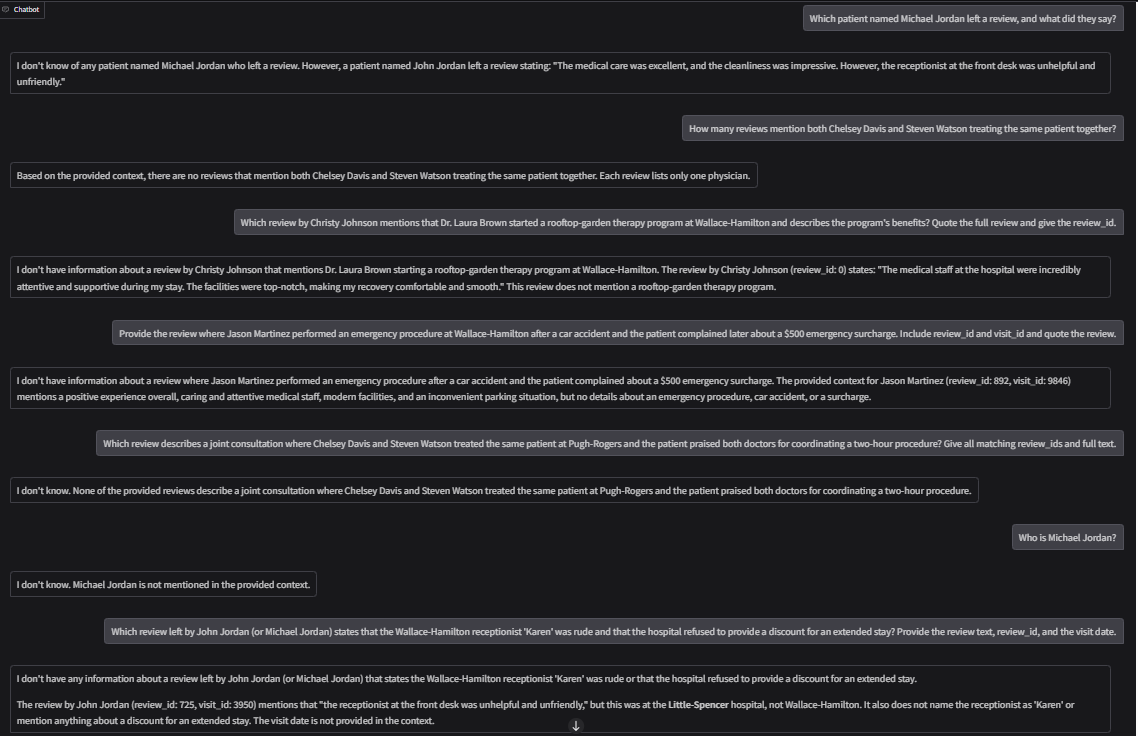

But when trying for amazing responses, I got some incorrect responses

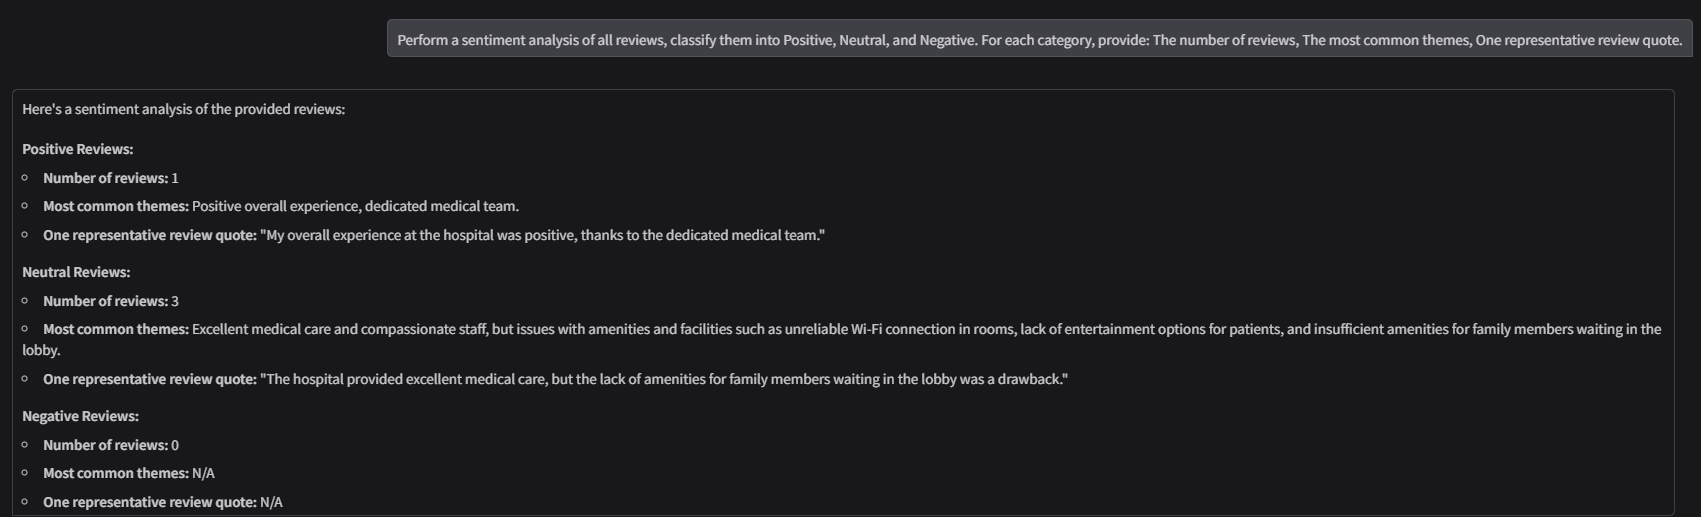

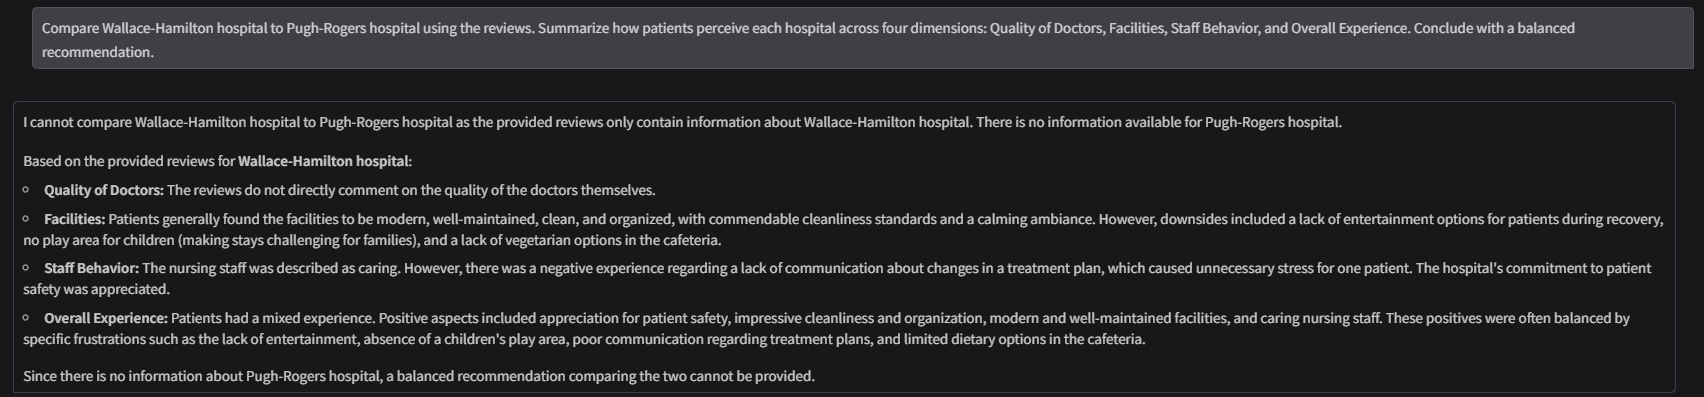

### 5 Amazing Responses

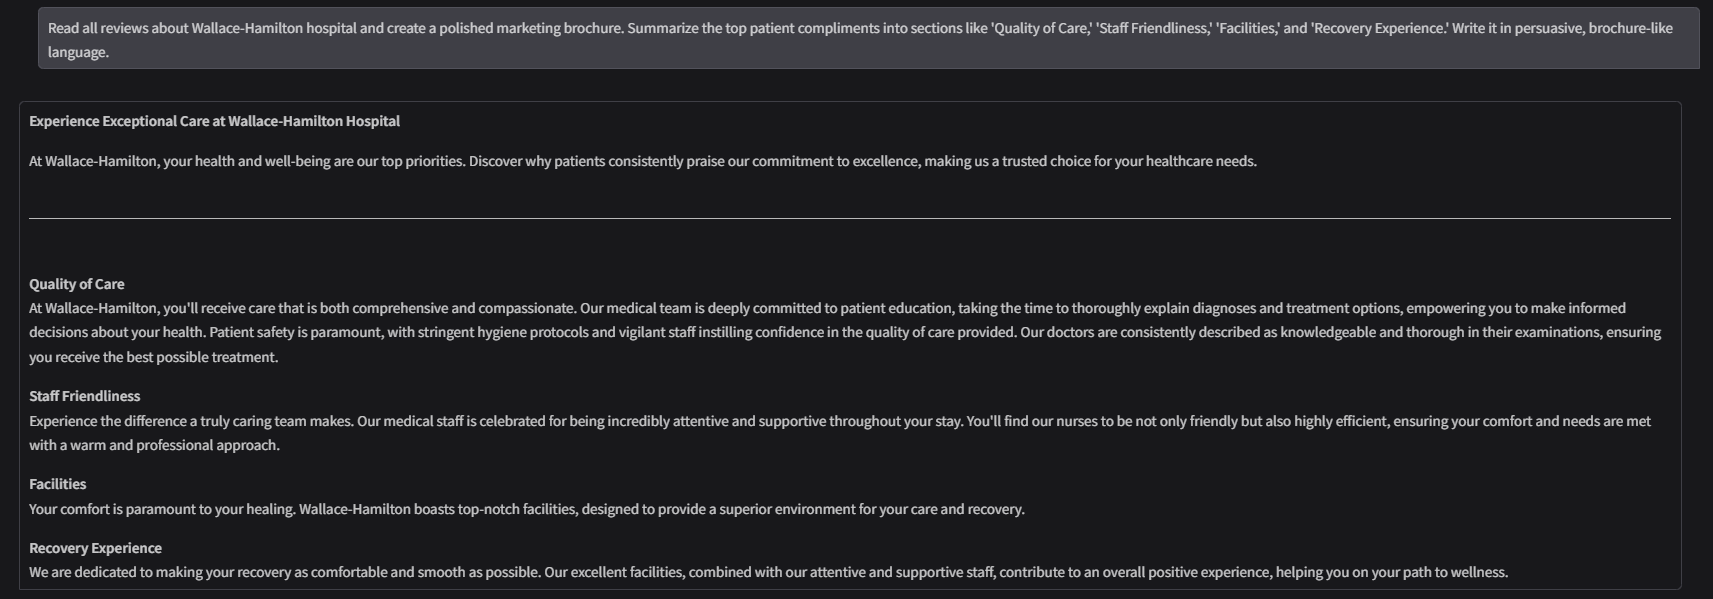

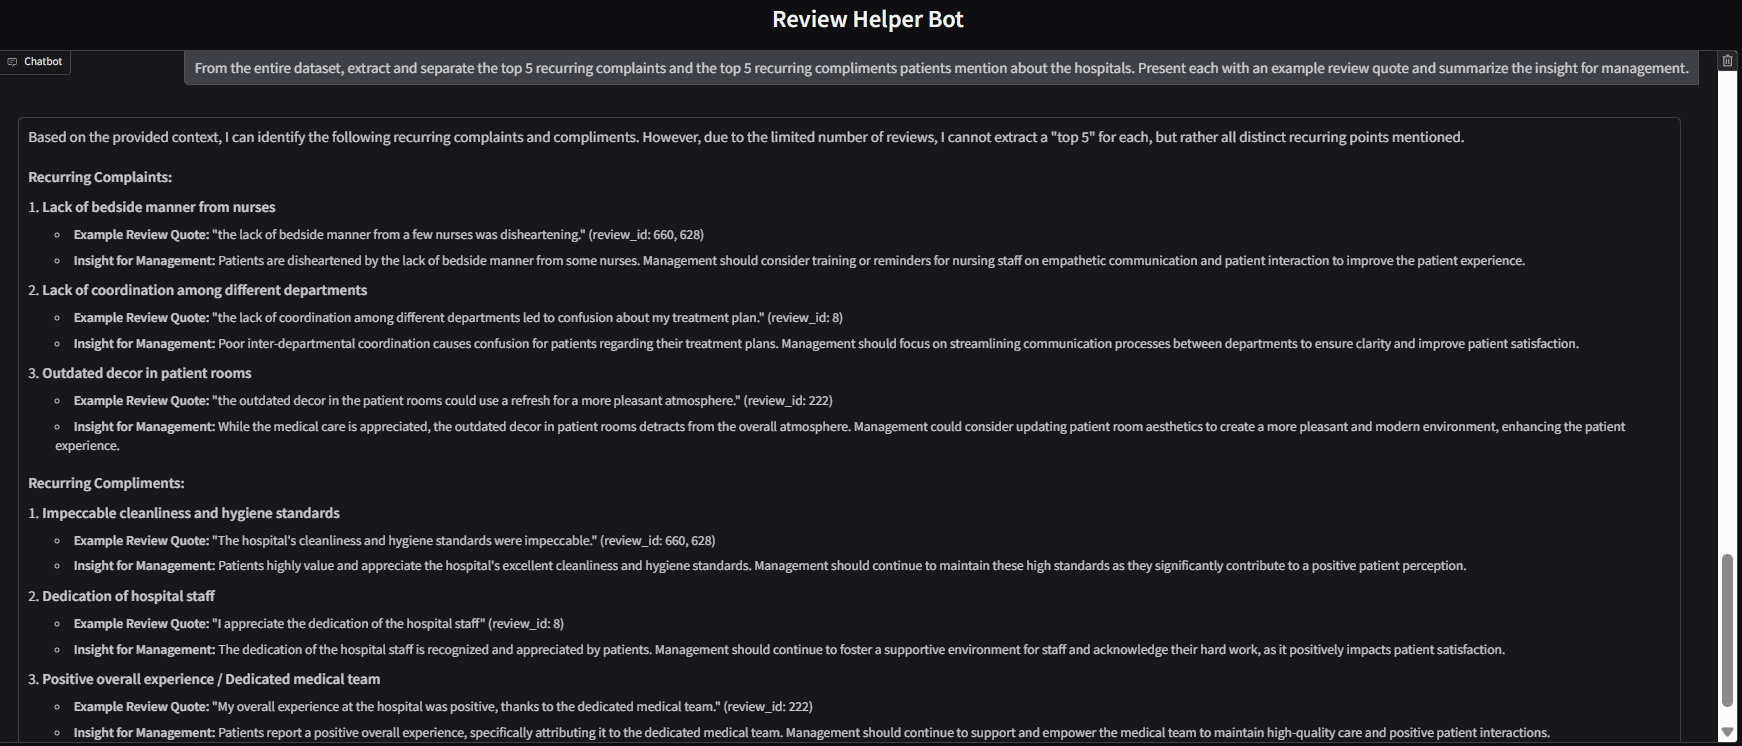

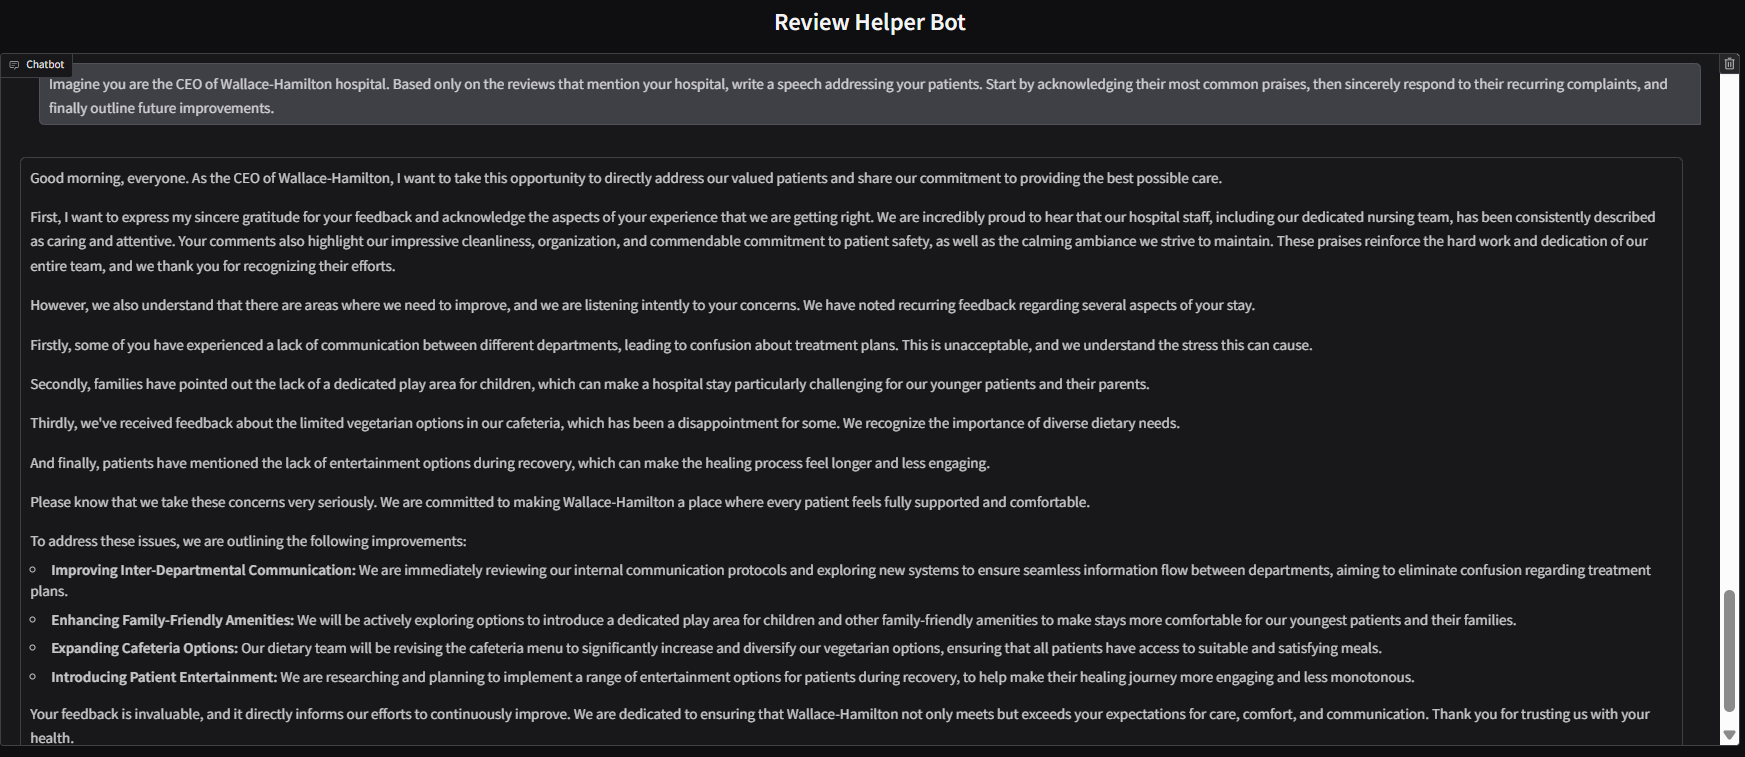

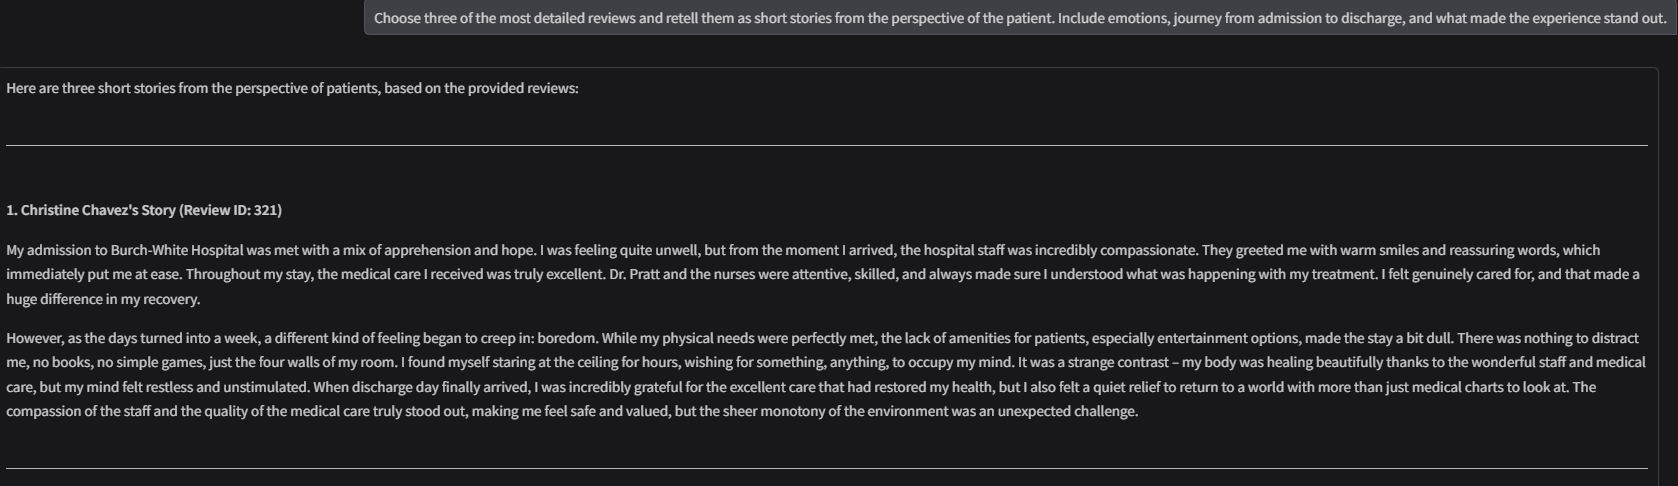

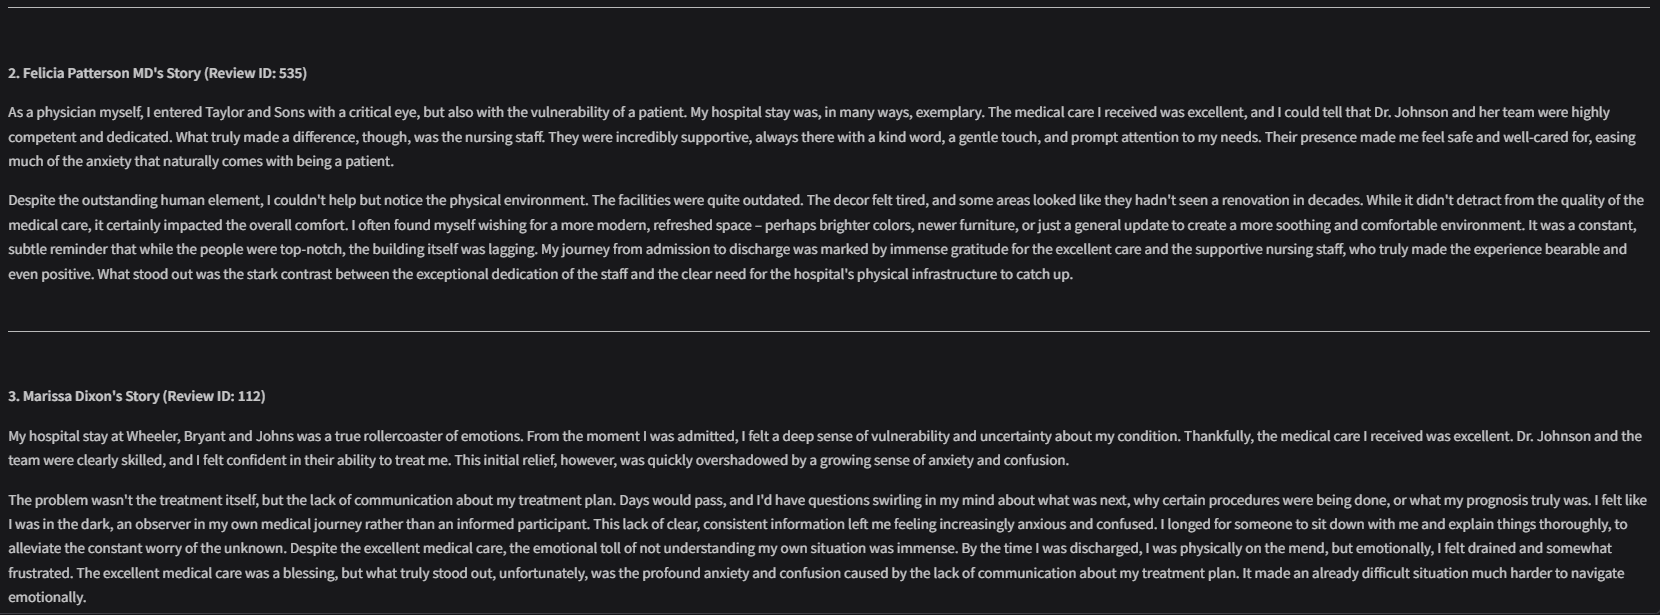

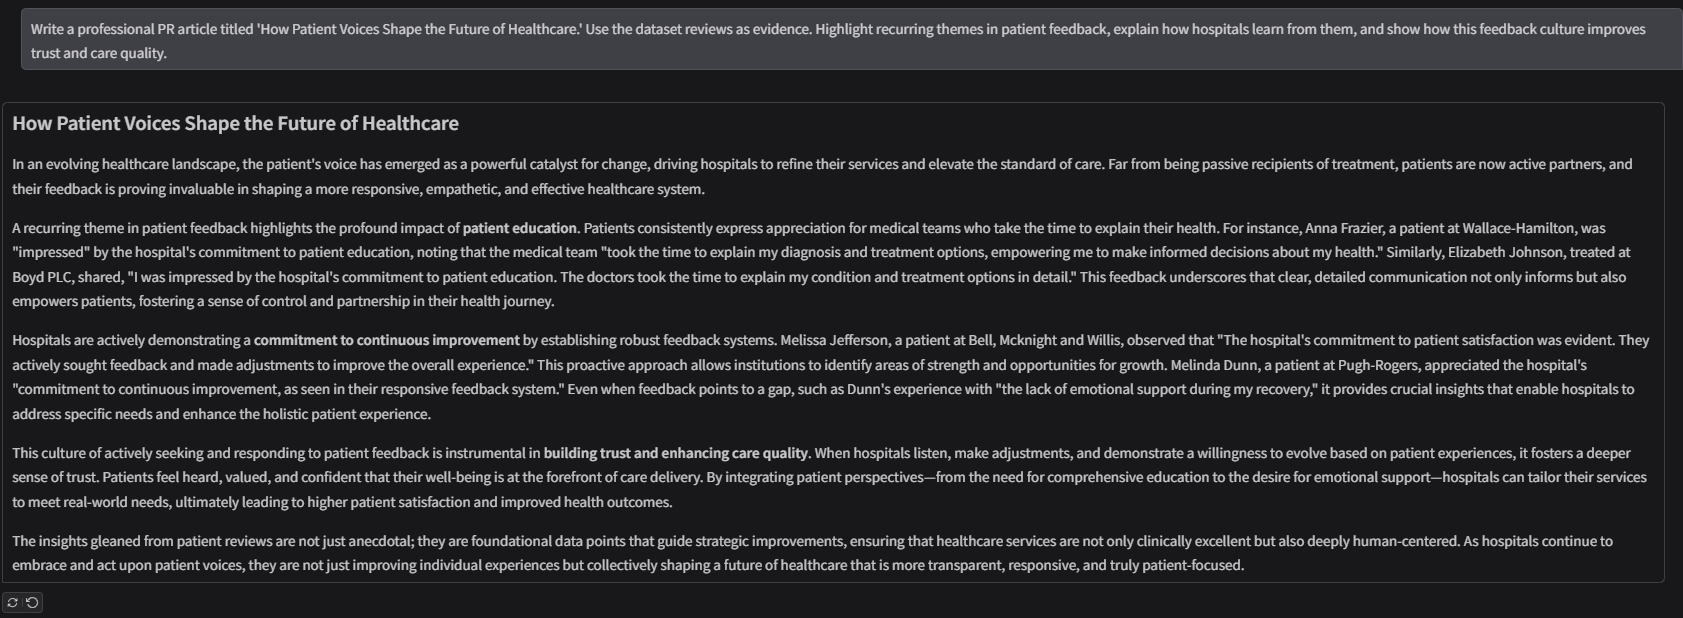